
✅ Kα 기준 n=1~3 회절 정합성 결과 (이론 λ 기반 오차):

+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|    |   회절 차수 n |   예상 θ (deg) |   측정 θ (deg) |   계산 λ (Å) |   이론 λ (Å) |   λ 상대 오차 (%) |
+====+===============+================+================+==============+==============+===================+
|  0 |        1.0000 |         7.2401 |         7.2000 |       0.7069 |       0.7108 |            0.5516 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|  1 |        2.0000 |        14.5993 |        14.6000 |       0.7108 |       0.7108 |            0.0050 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|  2 |        3.0000 |        22.2151 |        22.2000 |       0.7103 |       0.7108 |            0.0646 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+


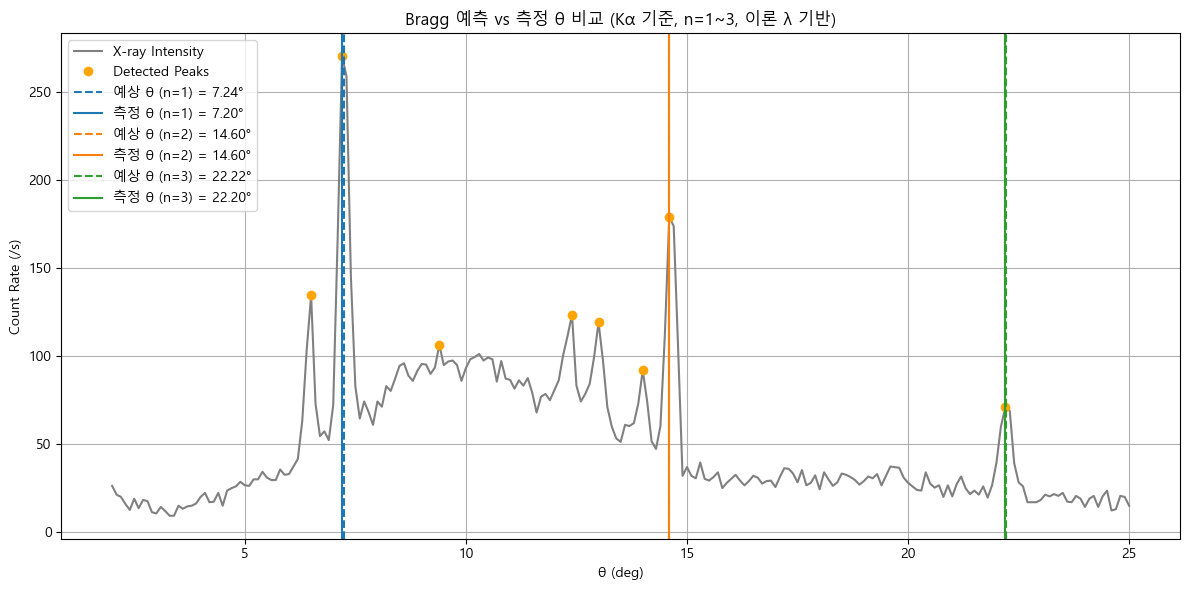

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tabulate import tabulate
from matplotlib import rcParams

# 한글 폰트 설정 (Windows)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기
df = pd.read_csv("실험1_완전정리.csv")
theta = df["theta_deg"].values
counts = df["count_rate"].values

# 2. 피크 검출
peaks, _ = find_peaks(counts, prominence=20)
theta_peaks = theta[peaks]
counts_peaks = counts[peaks]

# 3. λ 계산
d = 2.820  # NaCl 격자 간격 (Å)
lambda_peaks = 2 * d * np.sin(np.deg2rad(theta_peaks))
df_peaks = pd.DataFrame({
    "theta_deg": theta_peaks,
    "count_rate": counts_peaks,
    "lambda_angstrom": lambda_peaks
}).sort_values(by="theta_deg").reset_index(drop=True)

# 4. 기준 Kα 이론 λ
lambda_ka_theory = 0.7108  # Mo Kα 이론값

# 5. Kα 피크 선택 (n=1 실측 λ는 참고용)
ka_peak = df_peaks.loc[(df_peaks["theta_deg"] > 7.0) & (df_peaks["theta_deg"] < 7.4)]\
                  .sort_values(by="count_rate", ascending=False).iloc[0]

# 6. Bragg 정합성 분석 (n=1,2,3 기준 θ와 실측 θ 비교)
n_list = [1, 2, 3]
bragg_check = []

for n in n_list:
    theta_pred = np.rad2deg(np.arcsin(n * lambda_ka_theory / (2 * d)))
    nearest_peak = df_peaks.iloc[(df_peaks["theta_deg"] - theta_pred).abs().argsort().iloc[0]]
    measured_theta = nearest_peak["theta_deg"]
    measured_lambda = 2 * d * np.sin(np.deg2rad(measured_theta)) / n
    lambda_error = abs(measured_lambda - lambda_ka_theory) / lambda_ka_theory * 100

    bragg_check.append({
        "회절 차수 n": n,
        "예상 θ (deg)": theta_pred,
        "측정 θ (deg)": measured_theta,
        "계산 λ (Å)": measured_lambda,
        "이론 λ (Å)": lambda_ka_theory,
        "λ 상대 오차 (%)": lambda_error
    })

df_bragg_check = pd.DataFrame(bragg_check)

# 7. 표 출력
print("\n✅ Kα 기준 n=1~3 회절 정합성 결과 (이론 λ 기반 오차):\n")
print(tabulate(df_bragg_check, headers="keys", tablefmt="grid", floatfmt=".4f"))

# 8. 시각화
plt.figure(figsize=(12, 6))
plt.plot(theta, counts, label="X-ray Intensity", color="gray")
plt.plot(theta_peaks, counts_peaks, 'o', color="orange", label="Detected Peaks")

colors = ['C0', 'C1', 'C2']
for i, row in enumerate(bragg_check):
    plt.axvline(row["예상 θ (deg)"], color=colors[i], linestyle="--",
                label=f"예상 θ (n={row['회절 차수 n']}) = {row['예상 θ (deg)']:.2f}°")
    plt.axvline(row["측정 θ (deg)"], color=colors[i], linestyle="-",
                label=f"측정 θ (n={row['회절 차수 n']}) = {row['측정 θ (deg)']:.2f}°")

plt.xlabel("θ (deg)")
plt.ylabel("Count Rate (/s)")
plt.title("Bragg 예측 vs 측정 θ 비교 (Kα 기준, n=1~3, 이론 λ 기반)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



✅ Kβ 기준 n=1~3 회절 정합성 결과 (이론 λ 기반 오차):

+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|    |   회절 차수 n |   예상 θ (deg) |   측정 θ (deg) |   계산 λ (Å) |   이론 λ (Å) |   λ 상대 오차 (%) |
+====+===============+================+================+==============+==============+===================+
|  0 |        1.0000 |         6.4226 |         6.5000 |       0.6385 |       0.6309 |            1.1993 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|  1 |        2.0000 |        12.9278 |        13.0000 |       0.6344 |       0.6309 |            0.5487 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+
|  2 |        3.0000 |        19.6081 |        22.2000 |       0.7103 |       0.6309 |           12.5916 |
+----+---------------+----------------+----------------+--------------+--------------+-------------------+


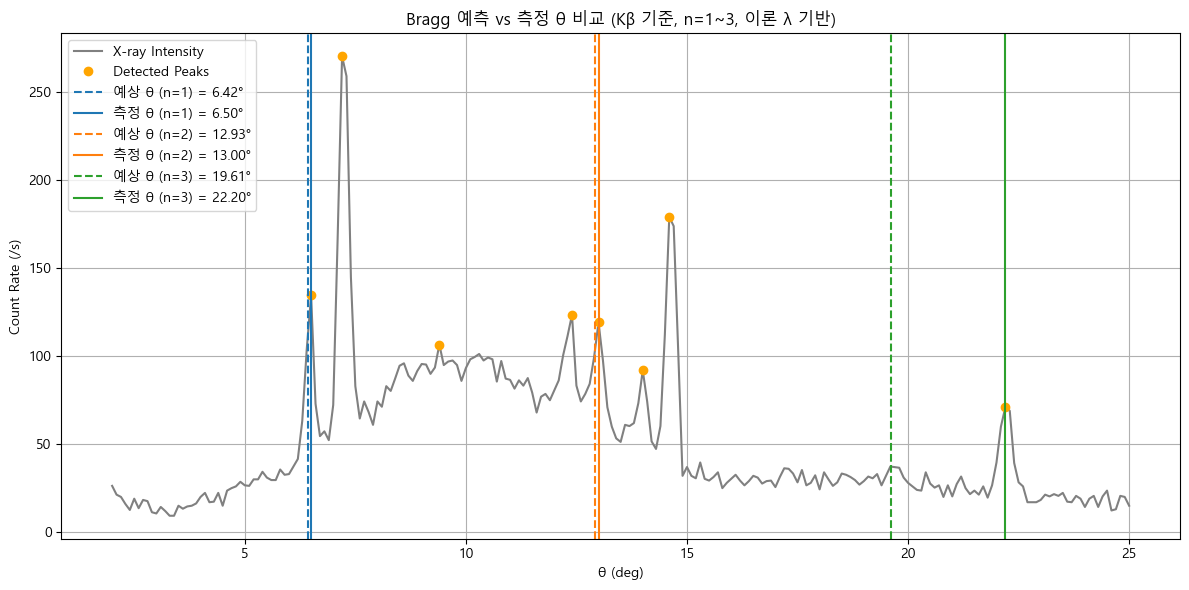

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tabulate import tabulate

# 1. 실험 데이터 불러오기
df = pd.read_csv("실험1_완전정리.csv")
theta = df["theta_deg"].values
counts = df["count_rate"].values

# 2. 피크 검출
peaks, _ = find_peaks(counts, prominence=20)
theta_peaks = theta[peaks]
counts_peaks = counts[peaks]

# 3. λ 계산
d = 2.820  # NaCl 격자 간격 (Å)
lambda_peaks = 2 * d * np.sin(np.deg2rad(theta_peaks))
df_peaks = pd.DataFrame({
    "theta_deg": theta_peaks,
    "count_rate": counts_peaks,
    "lambda_angstrom": lambda_peaks
}).sort_values(by="theta_deg").reset_index(drop=True)

# 4. 기준 Kβ 이론 λ
lambda_kb_theory = 0.6309  # Mo Kβ 이론값

# 5. Kβ 피크 선택 (θ < 7.0 중에서 가장 강한 피크)
kb_peak = df_peaks[df_peaks["theta_deg"] < 7.0]\
    .sort_values(by="count_rate", ascending=False).iloc[0]

# 6. Bragg 정합성 분석 (n=1, 2, 3)
n_list = [1, 2, 3]
bragg_check_kb = []

for n in n_list:
    # 이론 θ 계산
    theta_pred = np.rad2deg(np.arcsin(n * lambda_kb_theory / (2 * d)))
    # 실측값 중 가장 가까운 피크 찾기
    nearest_peak = df_peaks.iloc[(df_peaks["theta_deg"] - theta_pred).abs().argsort().iloc[0]]
    measured_theta = nearest_peak["theta_deg"]
    measured_lambda = 2 * d * np.sin(np.deg2rad(measured_theta)) / n
    lambda_error = abs(measured_lambda - lambda_kb_theory) / lambda_kb_theory * 100

    bragg_check_kb.append({
        "회절 차수 n": n,
        "예상 θ (deg)": theta_pred,
        "측정 θ (deg)": measured_theta,
        "계산 λ (Å)": measured_lambda,
        "이론 λ (Å)": lambda_kb_theory,
        "λ 상대 오차 (%)": lambda_error
    })

df_bragg_check_kb = pd.DataFrame(bragg_check_kb)

# 7. tabulate 표 출력
print("\n✅ Kβ 기준 n=1~3 회절 정합성 결과 (이론 λ 기반 오차):\n")
print(tabulate(df_bragg_check_kb, headers="keys", tablefmt="grid", floatfmt=".4f"))

# 8. 예측 θ vs 측정 θ 시각화
plt.figure(figsize=(12, 6))
plt.plot(theta, counts, label="X-ray Intensity", color="gray")
plt.plot(theta_peaks, counts_peaks, 'o', color="orange", label="Detected Peaks")

colors = ['C0', 'C1', 'C2']
for i, row in enumerate(bragg_check_kb):
    plt.axvline(row["예상 θ (deg)"], color=colors[i], linestyle="--",
                label=f"예상 θ (n={row['회절 차수 n']}) = {row['예상 θ (deg)']:.2f}°")
    plt.axvline(row["측정 θ (deg)"], color=colors[i], linestyle="-",
                label=f"측정 θ (n={row['회절 차수 n']}) = {row['측정 θ (deg)']:.2f}°")

plt.xlabel("θ (deg)")
plt.ylabel("Count Rate (/s)")
plt.title("Bragg 예측 vs 측정 θ 비교 (Kβ 기준, n=1~3, 이론 λ 기반)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



 Kα & Kβ 회절 정합성 분석 결과 (Kβ n=3 생략, 소수점 4자리):

╒════╤════════╤═══════════════╤════════════════╤════════════════╤══════════════╤══════════════╤═══════════════════╕
│    │  구분  │  회절 차수 n  │  예상 θ (deg)  │  측정 θ (deg)  │  계산 λ (Å)  │  이론 λ (Å)  │  λ 상대 오차 (%)  │
╞════╪════════╪═══════════════╪════════════════╪════════════════╪══════════════╪══════════════╪═══════════════════╡
│ 0  │   Kα   │       1       │     7.2401     │     7.2000     │    0.7069    │    0.7108    │      0.5516       │
├────┼────────┼───────────────┼────────────────┼────────────────┼──────────────┼──────────────┼───────────────────┤
│ 1  │   Kα   │       2       │    14.5993     │    14.6000     │    0.7108    │    0.7108    │      0.0050       │
├────┼────────┼───────────────┼────────────────┼────────────────┼──────────────┼──────────────┼───────────────────┤
│ 2  │   Kα   │       3       │    22.2151     │    22.2000     │    0.7103    │    0.7108    │      0.0646       │
├────┼────────┼───────────────┼─────────────

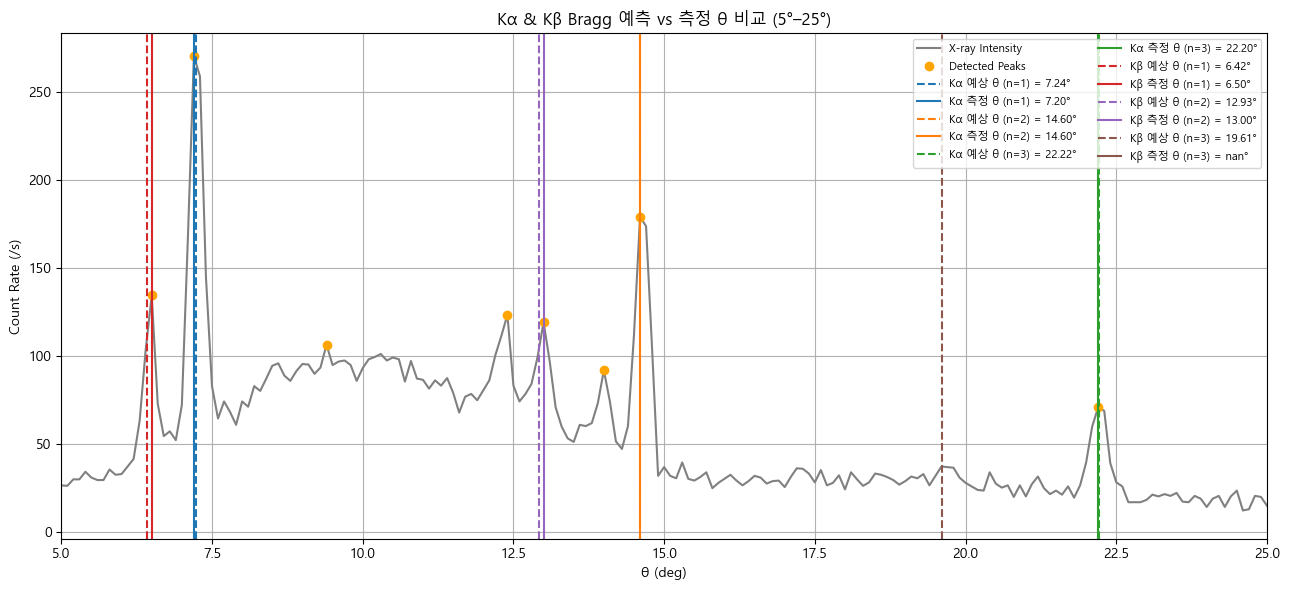

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tabulate import tabulate
from matplotlib import rcParams

# 한글 폰트 설정 (Windows)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

# 1. load data
df = pd.read_csv("실험1_완전정리.csv")
theta = df["theta_deg"].values
counts = df["count_rate"].values

# 2. peak detection
peaks, _ = find_peaks(counts, prominence=20)
theta_peaks = theta[peaks]
counts_peaks = counts[peaks]

# 3. lambda calculation
d = 2.820  # NaCl grid
lambda_peaks = 2 * d * np.sin(np.deg2rad(theta_peaks))
df_peaks = pd.DataFrame({
    "theta_deg": theta_peaks,
    "count_rate": counts_peaks,
    "lambda_angstrom": lambda_peaks
}).sort_values(by="theta_deg").reset_index(drop=True)

# 4. theoretical values
lambda_ka_theory = 0.7108
lambda_kb_theory = 0.6309

# 5. peak selection
ka_peak = df_peaks[(df_peaks["theta_deg"] > 7.0) & (df_peaks["theta_deg"] < 7.4)]\
    .sort_values(by="count_rate", ascending=False).iloc[0]
kb_peak = df_peaks[df_peaks["theta_deg"] < 7.0]\
    .sort_values(by="count_rate", ascending=False).iloc[0]

# 6. Bragg check process
def bragg_check_process(label, lambda_theory, max_n=3, skip_n=None):
    result = []
    for n in range(1, max_n + 1):
        if skip_n and n in skip_n:
            result.append({
                "구분": label,
                "회절 차수 n": n,
                "예상 θ (deg)": np.rad2deg(np.arcsin(n * lambda_theory / (2 * d))),
                "측정 θ (deg)": None,
                "계산 λ (Å)": None,
                "이론 λ (Å)": lambda_theory,
                "λ 상대 오차 (%)": None
            })
            continue
        theta_pred = np.rad2deg(np.arcsin(n * lambda_theory / (2 * d)))
        nearest_peak = df_peaks.iloc[(df_peaks["theta_deg"] - theta_pred).abs().argsort().iloc[0]]
        measured_theta = nearest_peak["theta_deg"]
        measured_lambda = 2 * d * np.sin(np.deg2rad(measured_theta)) / n
        lambda_error = abs(measured_lambda - lambda_theory) / lambda_theory * 100
        result.append({
            "구분": label,
            "회절 차수 n": n,
            "예상 θ (deg)": theta_pred,
            "측정 θ (deg)": measured_theta,
            "계산 λ (Å)": measured_lambda,
            "이론 λ (Å)": lambda_theory,
            "λ 상대 오차 (%)": lambda_error
        })
    return result

# 7. analyze except Kb n=3
ka_results = bragg_check_process("Kα", lambda_ka_theory)
kb_results = bragg_check_process("Kβ", lambda_kb_theory, skip_n=[3])
df_combined = pd.DataFrame(ka_results + kb_results)

# 8. display results
df_display = df_combined.copy()
for col in ["예상 θ (deg)", "측정 θ (deg)", "계산 λ (Å)", "이론 λ (Å)", "λ 상대 오차 (%)"]:
    df_display[col] = df_display[col].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else "-")

print("\n Kα & Kβ 회절 정합성 분석 결과 (Kβ n=3 생략, 소수점 4자리):\n")
df_aligned = df_display.astype(str)

print(tabulate(df_aligned, headers="keys", tablefmt="fancy_grid", stralign="center", numalign="center"))


# 9. visualization
plt.figure(figsize=(13, 6))
plt.plot(theta, counts, label="X-ray Intensity", color="gray")
plt.plot(theta_peaks, counts_peaks, 'o', color="orange", label="Detected Peaks")

colors = {'Kα': ['C0', 'C1', 'C2'], 'Kβ': ['C3', 'C4', 'C5']}
for i, row in df_combined.iterrows():
    if row["측정 θ (deg)"] is None:
        continue
    color = colors[row["구분"]][int(row["회절 차수 n"]) - 1]
    plt.axvline(row["예상 θ (deg)"], color=color, linestyle="--",
                label=f"{row['구분']} 예상 θ (n={row['회절 차수 n']}) = {row['예상 θ (deg)']:.2f}°")
    plt.axvline(row["측정 θ (deg)"], color=color, linestyle="-",
                label=f"{row['구분']} 측정 θ (n={row['회절 차수 n']}) = {row['측정 θ (deg)']:.2f}°")

plt.xlabel("θ (deg)")
plt.ylabel("Count Rate (/s)")
plt.title("Kα & Kβ Bragg 예측 vs 측정 θ 비교 (5°–25°)")
plt.xlim(5, 25)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
